#### Automating Crypto Website API with Python

##### I used coinmarketcap.com API and use the key by creating an account on coinmarketcap
###### The QuickStart is available on the documentation of coinmarketcap and copied the code for Python. Also, changed the API to pro-api from Documentation at url

In [1]:
# Copied from coinmarketcap for startup with my Key Generated.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

import os
from time import time
from time import sleep

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',        #limit set 10 rows only instead of 5000
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd2b7c480-63ac-450f-b30e-df38c0b56c7a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# [jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10] Used this to increase the Jupyter Notebook limit

{'status': {'timestamp': '2023-04-09T21:01:19.425Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9124}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

###### Normalize the data as it is currently in Json so that later visulization can be interpreted easily with clear columns and data.

In [2]:
print (type (data) )

<class 'dict'>


In [20]:
#  Pandas show rows and columns

#pd.options.display.max_rows = None
#pd.options.display.max_colummns = None

pd.set_option ('display.max_columns', None)  #Display full column name instead of ...
pd.set_option ('display.max_rows', None)


In [21]:
df = pd.json_normalize (data ['data'] )             #Noramlize Json data

df ['timestamp'] = pd.to_datetime ('now', utc = True)          #Add timestamp column to know when the execution was successful
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19341843.00,19341843.00,False,NaN,1,None,None,None,2023-04-09T20:59:00.000Z,28121.79,10823534727.21,14.58,-0.10,0.66,0.17,40.68,23.04,63.39,543927295440.55,46.05,590557642529.29,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:11:42.888197+00:00
1,1027,Ethereum,ETH,ethereum,6711,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457776.00,120457776.00,False,NaN,2,None,None,None,2023-04-09T20:59:00.000Z,1856.17,6091978750.25,17.98,-0.04,0.01,3.74,30.82,12.93,40.67,223590527043.45,18.93,223590527043.45,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:11:42.888197+00:00
2,825,Tether,USDT,tether,50938,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80210538011.07,83091735571.86,False,NaN,3,None,None,None,2023-04-09T20:59:00.000Z,1.00,18914078896.95,6.68,-0.01,0.01,0.03,0.03,0.03,0.05,80247946282.65,6.80,83130487564.89,None,2023-04-09T20:59:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 21:11:42.888197+00:00
3,1839,BNB,BNB,bnb,1249,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157886581.37,157886581.37,False,NaN,4,None,None,None,2023-04-09T20:59:00.000Z,312.12,460497107.45,0.19,0.04,0.38,-0.27,12.84,-4.19,14.58,49279800326.36,4.17,49279800326.36,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:11:42.888197+00:00
4,3408,USD Coin,USDC,usd-coin,11590,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32600464084.03,32600464084.03,False,NaN,5,None,None,None,2023-04-09T20:59:00.000Z,1.00,2391367340.81,2.30,-0.01,-0.01,0.02,-0.04,-0.01,-0.02,32592540004.79,2.76,32592540004.79,None,2023-04-09T20:59:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 21:11:42.888197+00:00
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,51688470797.00,99989014677.00,False,NaN,6,None,None,None,2023-04-09T20:59:00.000Z,0.51,537754307.11,-13.96,-0.09,-0.20,-2.44,36.80,27.43,44.49,26122986406.83,2.21,50539290491.73,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:11:42.888197+00:00
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,34763302212.68,35660688966.54,False,NaN,7,None,None,None,2023-04-09T20:59:00.000Z,0.39,191933892.13,-7.00,-0.33,1.48,2.64,25.34,-0.31,25.19,13554241666.35,1.15,17545539007.03,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:11:42.888197+00:00
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138871476383.71,138871476383.71,False,NaN,8,None,None,None,2023-04-09T20:59:00.000Z,0.08,460952165.62,-7.66,-0.29,2.08,4.15,26.89,-7.10,9.79,11538353968.33,0.98,11538353968.33,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:11:42.888197+00:00
8,3890,Polygon,MATIC,polygon,649,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00,9164469069.28,10000000000.00,False,NaN,9,None,None,None,2023-04-09T20:59:00.000Z,1.10,170419456.63,22.34,-0.15,-0.95,0.

###### Now, automate the whole system rather than manually executing them.

In [5]:
def run_api ():
   #API
    global df         # local variable df to global
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd2b7c480-63ac-450f-b30e-df38c0b56c7a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #Normalize
    #Here we append data so that it fits to original data_normalized dataset,hence df defined       
    
    #df_new = pd.json_normalize (data ['data'] )     

    #df_new ['timestamp'] = pd.to_datetime ('now', utc = True)          
    #-------------------df = df.append (df_new)-----------works,but unused code
    #df = pd.concat ([df, df_new])   # Same as append
    
    #Here, original df is used since df_new if used in csv as well, creates duplicates in csv. Thus, foolowing code applied.
    df = pd.json_normalize (data ['data'])
    df['timestamp'] = pd.to_datetime ('now', utc = True) #utc given since it throws error without
    display (df)
    
    
    #Add the df into the csv in the local directory automatically
    if not os.path.isfile ('C:\DataAnalytics\API_Auto.csv'):
        df.to_csv ('C:\DataAnalytics\API_Auto.csv', header = 'column_names')
    else:
        df.to_csv ('C:\DataAnalytics\API_Auto.csv', header = False, mode = 'a')        # mode =a is to append data
    

###### Automate the function

In [6]:
#Script to run it automatically


for i in range (333):                                  #333 as the  coinmarketcap API gives 333 runs a day
    run_api () 
    print ('API successsfully executed!!!')
    sleep (60)                                    #sleep for 60 seconds
exit ()


{'status': {'timestamp': '2023-04-09T21:01:19.848Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None, 'total_count': 9124}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934184e+07,1.934184e+07,False,NaN,1,None,None,None,2023-04-09T20:59:00.000Z,28121.792501,1.082353e+10,14.5804,-0.103354,0.661411,0.167076,40.684873,23.041786,63.389689,5.439273e+11,46.0546,5.905576e+11,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:01:17.640442+00:00
1,1027,Ethereum,ETH,ethereum,6711,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,None,None,None,2023-04-09T20:59:00.000Z,1856.173462,6.091979e+09,17.9844,-0.036955,0.005684,3.743036,30.822187,12.929480,40.671583,2.235905e+11,18.9349,2.235905e+11,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:01:17.640442+00:00
2,825,Tether,USDT,tether,50938,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.021054e+10,8.309174e+10,False,NaN,3,None,None,None,2023-04-09T20:59:00.000Z,1.000466,1.891408e+10,6.6828,-0.007809,0.006625,0.031011,0.027096,0.032435,0.048209,8.024795e+10,6.7958,8.313049e+10,None,2023-04-09T20:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 21:01:17.640442+00:00
3,1839,BNB,BNB,bnb,1249,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578866e+08,1.578866e+08,False,NaN,4,None,None,None,2023-04-09T20:59:00.000Z,312.121524,4.604971e+08,0.1889,0.037378,0.377815,-0.270168,12.836984,-4.190240,14.578744,4.927980e+10,4.1728,4.927980e+10,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:01:17.640442+00:00
4,3408,USD Coin,USDC,usd-coin,11590,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.260046e+10,3.260046e+10,False,NaN,5,None,None,None,2023-04-09T20:59:00.000Z,0.999757,2.391367e+09,2.3023,-0.009513,-0.006851,0.022874,-0.041794,-0.013883,-0.019208,3.259254e+10,2.7601,3.259254e+10,None,2023-04-09T20:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 21:01:17.640442+00:00
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,None,None,None,2023-04-09T20:59:00.000Z,0.505393,5.377543e+08,-13.9637,-0.087459,-0.201189,-2.444770,36.799741,27.433882,44.494355,2.612299e+10,2.2120,5.053929e+10,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:01:17.640442+00:00
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.476330e+10,3.566069e+10,False,NaN,7,None,None,None,2023-04-09T20:59:00.000Z,0.389901,1.919339e+08,-6.9982,-0.333543,1.481717,2.640603,25.344166,-0.311177,25.186497,1.355424e+10,1.1478,1.754554e+10,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:01:17.640442+00:00
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388715e+11,1.388715e+11,False,NaN,8,None,None,None,2023-04-09T20:59:00.000Z,0.083087,4.609522e+08,-7.6607,-0.294918,2.077905,4.146591,26.886366,-7.096702,9.787508,1.153835e+10,0.9771,1.153835e+10,None,2023-04-09T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:01:17.640442+00:00
8,3890,Polygon,MATIC,polygon,649,2019-04-28T00:00:00.000

API successsfully executed!!!
{'status': {'timestamp': '2023-04-09T21:02:20.188Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9124}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multi

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934184e+07,1.934184e+07,False,NaN,1,None,None,None,2023-04-09T21:00:00.000Z,28124.106669,1.082469e+10,14.6043,-0.068979,0.701775,0.178454,40.688482,23.079465,63.399059,5.439721e+11,46.0584,5.906062e+11,None,2023-04-09T21:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:02:17.988998+00:00
1,1027,Ethereum,ETH,ethereum,6711,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,None,None,None,2023-04-09T21:00:00.000Z,1856.606692,6.092586e+09,18.0033,0.010973,0.063129,3.767813,30.864545,12.970257,40.693940,2.236427e+11,18.9393,2.236427e+11,None,2023-04-09T21:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:02:17.988998+00:00
2,825,Tether,USDT,tether,50938,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.021054e+10,8.309174e+10,False,NaN,3,None,None,None,2023-04-09T21:00:00.000Z,1.000368,1.891373e+10,6.6792,-0.017095,0.002551,0.030737,0.018122,0.022919,0.037247,8.024005e+10,6.7952,8.312231e+10,None,2023-04-09T21:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 21:02:17.988998+00:00
3,1839,BNB,BNB,bnb,1249,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578866e+08,1.578866e+08,False,NaN,4,None,None,None,2023-04-09T21:00:00.000Z,312.129853,4.604971e+08,0.1926,0.039305,0.373432,-0.266748,12.830964,-4.171892,14.576733,4.928112e+10,4.1729,4.928112e+10,None,2023-04-09T21:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:02:17.988998+00:00
4,3408,USD Coin,USDC,usd-coin,11590,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.260046e+10,3.260046e+10,False,NaN,5,None,None,None,2023-04-09T21:00:00.000Z,0.999694,2.391307e+09,2.3055,-0.013393,-0.002891,0.016256,-0.041176,-0.019634,-0.032319,3.259047e+10,2.7599,3.259047e+10,None,2023-04-09T21:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 21:02:17.988998+00:00
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,None,None,None,2023-04-09T21:00:00.000Z,0.505416,5.377169e+08,-13.9549,-0.082492,-0.194384,-2.464916,36.797035,27.441709,44.500902,2.612418e+10,2.2121,5.054160e+10,None,2023-04-09T21:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:02:17.988998+00:00
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.476330e+10,3.566069e+10,False,NaN,7,None,None,None,2023-04-09T21:00:00.000Z,0.389892,1.919414e+08,-6.9876,-0.329570,1.480220,2.618543,25.331374,-0.300078,25.174739,1.355393e+10,1.1478,1.754513e+10,None,2023-04-09T21:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:02:17.988998+00:00
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388715e+11,1.388715e+11,False,NaN,8,None,None,None,2023-04-09T21:00:00.000Z,0.083091,4.609530e+08,-7.6365,-0.293257,2.071092,4.150754,26.889489,-7.093330,9.773732,1.153895e+10,0.9772,1.153895e+10,None,2023-04-09T21:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:02:17.988998+00:00
8,3890,Polygon,MATIC,polygon,649,2019-04-28T00:00:00.000Z

API successsfully executed!!!
{'status': {'timestamp': '2023-04-09T21:03:20.558Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9124}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multi

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934184e+07,1.934184e+07,False,NaN,1,None,None,None,2023-04-09T21:01:00.000Z,28125.100272,1.079958e+10,14.4815,-0.102401,0.716049,0.232069,40.689915,23.121191,63.278410,5.439913e+11,46.0601,5.906271e+11,None,2023-04-09T21:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:03:18.353899+00:00
1,1027,Ethereum,ETH,ethereum,6711,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,None,None,None,2023-04-09T21:01:00.000Z,1856.518503,6.081863e+09,18.0415,-0.000344,0.076211,3.808773,30.847149,12.990244,40.553660,2.236321e+11,18.9367,2.236321e+11,None,2023-04-09T21:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:03:18.353899+00:00
2,825,Tether,USDT,tether,50938,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.021054e+10,8.309174e+10,False,NaN,3,None,None,None,2023-04-09T21:01:00.000Z,1.000395,1.889244e+10,6.5731,-0.011060,0.008717,0.025911,0.012528,0.022218,0.038212,8.024223e+10,6.7947,8.312457e+10,None,2023-04-09T21:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 21:03:18.353899+00:00
3,1839,BNB,BNB,bnb,1249,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578866e+08,1.578866e+08,False,NaN,4,None,None,None,2023-04-09T21:01:00.000Z,312.120672,4.591570e+08,0.0079,0.018280,0.401046,-0.267127,12.824015,-4.145662,14.474301,4.927967e+10,4.1728,4.927967e+10,None,2023-04-09T21:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:03:18.353899+00:00
4,3408,USD Coin,USDC,usd-coin,11590,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.260046e+10,3.260046e+10,False,NaN,5,None,None,None,2023-04-09T21:01:00.000Z,0.999701,2.384786e+09,2.0750,-0.007001,-0.017186,0.012594,-0.039717,-0.005302,-0.030000,3.259071e+10,2.7597,3.259071e+10,None,2023-04-09T21:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 21:03:18.353899+00:00
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,None,None,None,2023-04-09T21:01:00.000Z,0.505553,5.367117e+08,-13.8556,-0.040765,-0.105153,-2.515079,36.820484,27.551482,44.306901,2.613127e+10,2.2127,5.055533e+10,None,2023-04-09T21:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:03:18.353899+00:00
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.476330e+10,3.566069e+10,False,NaN,7,None,None,None,2023-04-09T21:01:00.000Z,0.389833,1.911733e+08,-6.9701,-0.305294,1.478173,2.617601,25.326920,-0.241879,24.923515,1.355189e+10,1.1475,1.754249e+10,None,2023-04-09T21:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:03:18.353899+00:00
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388715e+11,1.388715e+11,False,NaN,8,None,None,None,2023-04-09T21:01:00.000Z,0.083095,4.590180e+08,-7.9384,-0.249149,2.116943,4.164392,26.929839,-6.948240,9.655861,1.153950e+10,0.9771,1.153950e+10,None,2023-04-09T21:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 21:03:18.353899+00:00
8,3890,Polygon,MATIC,polygon,649,2019-04-28T00:00:00.000

API successsfully executed!!!


KeyboardInterrupt: 

In [7]:
# Read the automated csv 

csv_reading = pd.read_csv ('C:\DataAnalytics\API_Auto.csv')
csv_reading

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10147,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.934087e+07,1.934087e+07,False,NaN,1,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,27930.719194,9.476678e+09,-11.8464,-0.110307,0.120111,-1.948086,37.054131,20.194508,64.509624,5.402044e+11,45.9205,5.865451e+11,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
1,1,1027,Ethereum,ETH,ethereum,6706,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1854.985854,5.143659e+09,-36.9347,-0.170727,-0.190929,1.878262,28.680565,11.199379,45.954899,2.234475e+11,18.9937,2.234475e+11,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
2,2,825,Tether,USDT,tether,50911,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.019539e+10,8.309174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1.000338,1.782040e+10,-6.2110,-0.012595,-0.035469,0.000515,0.034284,0.026151,0.038266,8.022248e+10,6.8194,8.311981e+10,NaN,2023-04-08T21:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-08 21:34:49.764797
3,3,1839,BNB,BNB,bnb,1246,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578868e+08,1.578868e+08,False,NaN,4,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,311.007603,4.614982e+08,-2.5073,-0.058296,-0.058450,-1.334555,12.883924,-6.433583,15.128884,4.910399e+10,4.1744,4.910399e+10,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
4,4,3408,USD Coin,USDC,usd-coin,11564,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.260051e+10,3.260051e+10,False,NaN,5,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.999878,2.331876e+09,-19.0682,-0.006781,-0.008295,0.004562,-0.009885,-0.025464,-0.018494,3.259654e+10,2.7709,3.259654e+10,NaN,2023-04-08T21:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-08 21:34:49.764797
5,5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.505657,6.145466e+08,-41.5095,-0.275966,-1.479185,-0.869266,37.034333,25.746451,47.970930,2.613666e+10,2.2219,5.056574e+10,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
6,6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.475860e+10,3.566069e+10,False,NaN,7,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.385076,2.062574e+08,10.7077,-0.026888,0.769134,-2.313157,25.190151,-2.694991,32.077295,1.338470e+10,1.1378,1.732842e+10,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
7,7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.388580e+11,1.388580e+11,False,NaN,8,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.081407,5.030727e+08,-47.4375,-0.089861,-1.045717,-0.500765,23.379891,-11.617300,12.196693,1.130408e+10,0.9609,1.130408e+10,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
8,8,3890,Polygon,MATIC,polygon,648,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-soluti

 ##### Data Cleaning

In [8]:
# Columns circulating_supply, total_supply data are scientific, hence converting to more readable format.

pd.set_option ('display.float_format', lambda x: '%.2f' % x)  #lambda to transform or calculate elements or columns
display (csv_reading)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10147,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19340868.00,19340868.00,False,NaN,1,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,27930.72,9476678268.64,-11.85,-0.11,0.12,-1.95,37.05,20.19,64.51,540204353068.39,45.92,586545103065.50,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
1,1,1027,Ethereum,ETH,ethereum,6706,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120457776.00,120457776.00,False,NaN,2,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1854.99,5143659066.88,-36.93,-0.17,-0.19,1.88,28.68,11.20,45.95,223447470484.65,18.99,223447470484.65,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
2,2,825,Tether,USDT,tether,50911,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80195385809.39,83091735571.87,False,NaN,3,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1.00,17820398524.44,-6.21,-0.01,-0.04,0.00,0.03,0.03,0.04,80222477748.13,6.82,83119805967.53,NaN,2023-04-08T21:32:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-08 21:34:49.764797
3,3,1839,BNB,BNB,bnb,1246,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157886767.39,157886767.39,False,NaN,4,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,311.01,461498190.26,-2.51,-0.06,-0.06,-1.33,12.88,-6.43,15.13,49103985021.56,4.17,49103985021.56,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
4,4,3408,USD Coin,USDC,usd-coin,11564,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32600512573.75,32600512573.75,False,NaN,5,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1.00,2331876490.49,-19.07,-0.01,-0.01,0.00,-0.01,-0.03,-0.02,32596539256.45,2.77,32596539256.45,NaN,2023-04-08T21:32:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-08 21:34:49.764797
5,5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,51688470797.00,99989014677.00,False,NaN,6,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.51,614546591.86,-41.51,-0.28,-1.48,-0.87,37.03,25.75,47.97,26136656751.87,2.22,50565738062.79,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
6,6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00,34758598386.96,35660688966.54,False,NaN,7,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.39,206257425.29,10.71,-0.03,0.77,-2.31,25.19,-2.69,32.08,13384700377.97,1.14,17328417858.03,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
7,7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,138858036383.71,138858036383.71,False,NaN,8,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.08,503072664.56,-47.44,-0.09,-1.05,-0.50,23.38,-11.62,12.20,11304083656.15,0.96,11304083656.15,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
8,8,3890,Polygon,MATIC,polygon,648,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",10000000000.00,9164469069.28,10000000000.00,False,NaN,9,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1.11,139004572.53,-29.86,-0.18,-0.15,-0.30,9.46,-12.34,34.86,10129446590.50,

In [9]:
 #Group the Names of Crypto currencies

grouped_data = csv_reading.groupby ('name', sort = False) [['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean ()
grouped_data

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.09,0.27,-1.37,38.29,21.02,64.17
Ethereum,-0.11,-0.10,2.39,29.47,11.75,44.42
Tether,-0.02,-0.04,0.01,0.03,0.02,0.04
BNB,-0.02,0.06,-1.03,12.94,-5.75,14.87
USD Coin,-0.01,-0.02,0.01,-0.01,-0.02,-0.03
XRP,-0.24,-1.11,-1.36,37.10,26.26,46.97
Cardano,-0.12,0.95,-1.01,25.36,-2.03,30.02
Dogecoin,-0.29,-0.20,0.60,24.54,-10.37,11.36
Polygon,-0.14,-0.31,-0.10,8.51,-13.27,33.63


In [10]:
# Change the row and column
stacked = grouped_data.stack ()             #stack converts the columns to rows
stacked

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.09
          quote.USD.percent_change_24h     0.27
          quote.USD.percent_change_7d     -1.37
          quote.USD.percent_change_30d    38.29
          quote.USD.percent_change_60d    21.02
          quote.USD.percent_change_90d    64.17
Ethereum  quote.USD.percent_change_1h     -0.11
          quote.USD.percent_change_24h    -0.10
          quote.USD.percent_change_7d      2.39
          quote.USD.percent_change_30d    29.47
          quote.USD.percent_change_60d    11.75
          quote.USD.percent_change_90d    44.42
Tether    quote.USD.percent_change_1h     -0.02
          quote.USD.percent_change_24h    -0.04
          quote.USD.percent_change_7d      0.01
          quote.USD.percent_change_30d     0.03
          quote.USD.percent_change_60d     0.02
          quote.USD.percent_change_90d     0.04
BNB       quote.USD.percent_change_1h     -0.02
          quote.USD.percent_change_24h     0.06
 

In [11]:
type (stacked)   #Stack also converts the df to series

pandas.core.series.Series

In [12]:
# give a frame

value_stacked = stacked.to_frame (name = 'values')
value_stacked

values
name                                         
Bitcoin  quote.USD.percent_change_1h    -0.09
         quote.USD.percent_change_24h    0.27
         quote.USD.percent_change_7d    -1.37
         quote.USD.percent_change_30d   38.29
         quote.USD.percent_change_60d   21.02
         quote.USD.percent_change_90d   64.17
Ethereum quote.USD.percent_change_1h    -0.11
         quote.USD.percent_change_24h   -0.10
         quote.USD.percent_change_7d     2.39
         quote.USD.percent_change_30d   29.47
         quote.USD.percent_change_60d   11.75
         quote.USD.percent_change_90d   44.42
Tether   quote.USD.percent_change_1h    -0.02
         quote.USD.percent_change_24h   -0.04
         quote.USD.percent_change_7d     0.01
         quote.USD.percent_change_30d    0.03
         quote.USD.percent_change_60d    0.02
         quote.USD.percent_change_90d    0.04
BNB      quote.USD.percent_change_1h    -0.02
         quote.USD.percent_change_24h    0.06
         quote.USD.percent_change_7d    -1.03
         quote.USD.percent_change_30d   12.94
         quote.USD.percent_change_60d   -5.75
         quote.USD.percent_change_90d   14.87
USD Coin quote.USD.percent_change_1h    -0.01
         quote.USD.percent_change_24h   -0.02
         quote.USD.percent_change_7d     0.01
         quote.USD.percent_change_30d   -0.01
         quote.USD.percent_change_60d   -0.02
         quote.USD.percent_change_90d   -0.03
XRP      quote.USD.percent_change_1h    -0.24
         quote.USD.percent_change_24h   -1.11
         quote.USD.percent_change_7d    -1.36
         quote.USD.percent_change_30d   37.10
         quote.USD.percent_change_60d   26.26
         quote.USD.percent_change_90d   46.97
Cardano  quote.USD.percent_change_1h    -0.12
         quote.USD.percent_change_24h    0.95
         quote.USD.percent_change_7d    -1.01
         quote.USD.percent_change_30d   25.36
         quote.USD.percent_change_60d   -2.03
         quote.USD.percent_change_90d   30.02
Dogecoin quote.USD.percent_change_1h    -0.29
         quote.USD.percent_change_24h   -0.20
         quote.USD.percent_change_7d     0.60
         quote.USD.percent_change_30d   24.54
         quote.USD.percent_change_60d  -10.37
         quote.USD.percent_change_90d   11.36
Polygon  quote.USD.percent_change_1h    -0.14
         quote.USD.percent_change_24h   -0.31
         quote.USD.percent_change_7d    -0.10
         quote.USD.percent_change_30d    8.51
         quote.USD.percent_change_60d  -13.27
         quote.USD.percent_change_90d   33.63
Solana   quote.USD.percent_change_1h    -0.27
         quote.USD.percent_change_24h   -0.92
         quote.USD.percent_change_7d    -3.40
         quote.USD.percent_change_30d   16.45
         quote.USD.percent_change_60d  -13.94
         quote.USD.percent_change_90d   40.24

In [13]:
print (type (value_stacked) )
print ( 'COUNT = ', value_stacked.count () )

<class 'pandas.core.frame.DataFrame'>
COUNT =  values    60
dtype: int64


In [14]:
# Adding Index to value_stacked

index = pd.Index (range (60) )

index_df = value_stacked.reset_index ()
index_df

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.09
1,Bitcoin,quote.USD.percent_change_24h,0.27
2,Bitcoin,quote.USD.percent_change_7d,-1.37
3,Bitcoin,quote.USD.percent_change_30d,38.29
4,Bitcoin,quote.USD.percent_change_60d,21.02
5,Bitcoin,quote.USD.percent_change_90d,64.17
6,Ethereum,quote.USD.percent_change_1h,-0.11
7,Ethereum,quote.USD.percent_change_24h,-0.10
8,Ethereum,quote.USD.percent_change_7d,2.39
9,Ethereum,quote.USD.percent_change_30d,29.47


In [15]:
# Rename the column level_1
renamed = index_df.rename (columns = {'level_1': 'change_percent'} )
renamed

,name,change_percent,values
0,Bitcoin,quote.USD.percent_change_1h,-0.09
1,Bitcoin,quote.USD.percent_change_24h,0.27
2,Bitcoin,quote.USD.percent_change_7d,-1.37
3,Bitcoin,quote.USD.percent_change_30d,38.29
4,Bitcoin,quote.USD.percent_change_60d,21.02
5,Bitcoin,quote.USD.percent_change_90d,64.17
6,Ethereum,quote.USD.percent_change_1h,-0.11
7,Ethereum,quote.USD.percent_change_24h,-0.10
8,Ethereum,quote.USD.percent_change_7d,2.39
9,Ethereum,quote.USD.percent_change_30d,29.47


#### Visualization using Matplotlib and Seaborn

In [16]:
# Change the column names so the x-labels are clear

renamed ['change_percent'] = renamed['change_percent'].replace (['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1hr', '24hr', '7days', '30days', '60days', '90days'])
renamed

,name,change_percent,values
0,Bitcoin,1hr,-0.09
1,Bitcoin,24hr,0.27
2,Bitcoin,7days,-1.37
3,Bitcoin,30days,38.29
4,Bitcoin,60days,21.02
5,Bitcoin,90days,64.17
6,Ethereum,1hr,-0.11
7,Ethereum,24hr,-0.10
8,Ethereum,7days,2.39
9,Ethereum,30days,29.47


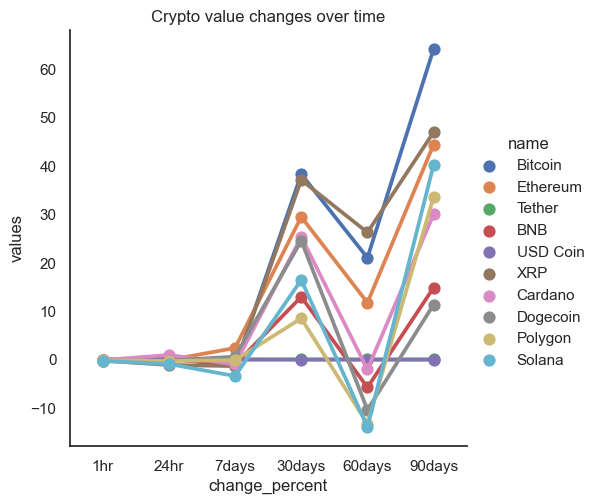

In [34]:
# Visulaization

sns.catplot(x='change_percent', y='values', data=renamed, hue='name', kind = 'point')
sns.set_theme (style = 'white', palette = None) 

plt.title ('Crypto value changes over time')
plt.show ()


In [58]:
grouped_data2 = csv_reading.groupby ('symbol', sort = False) [['cmc_rank', 'quote.USD.price']].mean()
grouped_data2

,cmc_rank,quote.USD.price
symbol,,
BTC,1.00,27979.53
ETH,2.00,1855.20
USDT,3.00,1.00
BNB,4.00,311.30
USDC,5.00,1.00
XRP,6.00,0.51
ADA,7.00,0.39
DOGE,8.00,0.08
MATIC,9.00,1.10


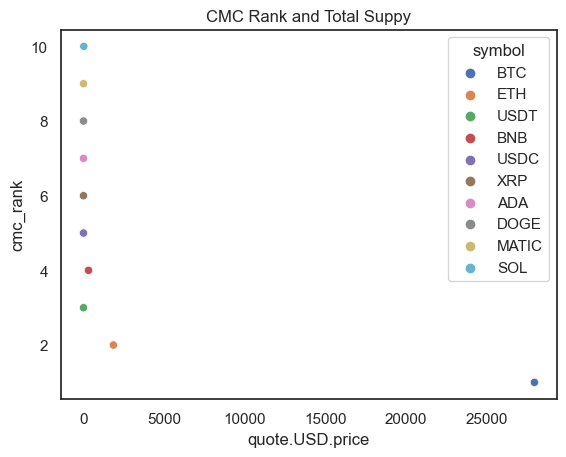

In [74]:
#Visulaization-2

sns.scatterplot (y = 'cmc_rank', x = 'quote.USD.price', data = grouped_data2, hue = 'symbol',)
sns.set_theme (style = 'white', palette = None) 

plt.title ('CMC Rank and Total Suppy')
plt.show ()

In [88]:
# Query and visualize BTC values with USD Price and Timestamp from the csv file created.

df_query = csv_reading [['symbol', 'quote.USD.price', 'quote.USD.last_updated']]
df_query = df_query.query (" symbol == 'BTC' ")
df_query


,symbol,quote.USD.price,quote.USD.last_updated
0,BTC,27930.72,2023-04-08T21:32:00.000Z
10,BTC,27922.28,2023-04-08T21:34:00.000Z
20,BTC,27922.28,2023-04-08T21:34:00.000Z
30,BTC,27925.96,2023-04-08T21:36:00.000Z
40,BTC,27924.57,2023-04-08T21:41:00.000Z
50,BTC,27924.42,2023-04-08T21:43:00.000Z
60,BTC,27924.42,2023-04-08T21:43:00.000Z
70,BTC,27929.24,2023-04-08T21:45:00.000Z
80,BTC,28121.79,2023-04-09T20:59:00.000Z
90,BTC,28124.11,2023-04-09T21:00:00.000Z


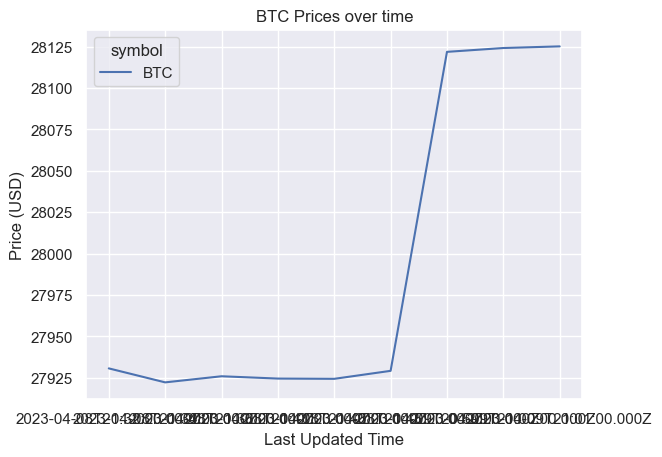

In [90]:
# Visualize df_query

sns.set_theme (style = 'darkgrid')         #needs to be kept before plot definition
sns.lineplot (x = 'quote.USD.last_updated', y = 'quote.USD.price', data = df_query, hue = 'symbol', markers = True)

plt.title ('BTC Prices over time')
plt.xlabel ('Last Updated Time')
plt.ylabel ('Price (USD)')
plt.show ()